Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = "NONE"

# Partial differential equations: The (parabolic) heat equation
The [heat equation](https://en.wikipedia.org/wiki/Heat_equation) is the typical example of a parabolic partial differential equation. Here we have the time and we are looking for an actual time evolution. It can be written as

\begin{equation}
\frac{\partial u}{\partial t} = \alpha \nabla^2 u,
\end{equation}
where $u$ represents the temperature, or the concentration (diffusion problem) and so on. The coefficient $\alpha$ takes into account the thermal conductivity, specific heat, and density of the material.

In the following, we will use as main references the book from Chapra and also
- https://github.com/numerical-mooc/numerical-mooc
- https://aquaulb.github.io/book_solving_pde_mooc/solving_pde_mooc/notebooks/01_Introduction/01_00_Preface.html
- Wikipedia

# The explicit method: Forward time centered space

As is usual in finite differences, we discretize both the spatial (up to second order) and the time (linear order) derivatives to get

\begin{equation}
\frac{u^{n+1}_i - u^n_i}{\Delta t} = \alpha \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2},
\end{equation}
where the superscript corresponds to a step in time, while the subscript corresponds to step in space (we are here solving a one-dimensional equation). This is the so called [FTCS - Forward Time Centered Space](https://en.wikipedia.org/wiki/FTCS_scheme) method, which is an [explicit method](https://en.wikipedia.org/wiki/Explicit_and_implicit_methods) which allows to compute the next (in time) value in terms of the previous one.

Reorganizing terms

\begin{equation}
u_{i}^{n+1} = u_{i}^{n}+\frac{\alpha\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}) = u_{i}^{n}+\lambda(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}),
\end{equation}
which can be visualized as
<center>
<img src="https://nbviewer.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/04_spreadout/figures/explicitFTCS-BCeffect.png" class="center">
</center>

By using the [von Neumann stability analysis](https://en.wikipedia.org/wiki/Von_Neumann_stability_analysis) it is possible to show that the solution is stable (errors are not amplified) only if

\begin{equation}
\lambda = \frac{\alpha \Delta t}{\Delta x^2} \le \frac{1}{2}.
\end{equation}

## Example: Finding the temperature distribution on a thind rod

Now let's solve an example (Chapra 30.1): A thin rod of 10 cm, with $\alpha = 0.835$ cm$^2$/s, $\Delta t = 0.1 $s, $\Delta x = 2$ cm, and $\lambda = \alpha \Delta t/\Delta x^2 = 0.020875$. The boundary conditions are $T(0) = 100$ C, and $T(10) = 50$ C.

In [2]:
# Setup imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Function to evolve
#Forward time centered space
def ftcs(T0, nsteps, deltat, deltax, lambdac):
    Taux = T0.copy() # avoids overwriting T0
    for niter in range(nsteps):
        #Taux[1:-1] = Taux[1:-1] + lambdac*(Taux[2:] - 2*Taux[1:-1] + Taux[0:-2])
        Taux[1:-2] = Taux[1:-2] + lambdac*(Taux[2:-1] - 2*Taux[1:-2] + Taux[0:-3])
    return Taux

In [4]:
# Setup problem
L = 10
DELTAT = 0.10
DELTAX = 0.40728
NX = int(L/DELTAX)
ALPHA = 0.835
LAMBDA = ALPHA*DELTAT/(DELTAX*DELTAX)
print(f"{LAMBDA}")

# Set the initial temperature along the rod.
T0 = np.zeros(NX)
T0[0] = 100.0
T0[-1] = 50
T0[-2] = 50

0.5033850431670218


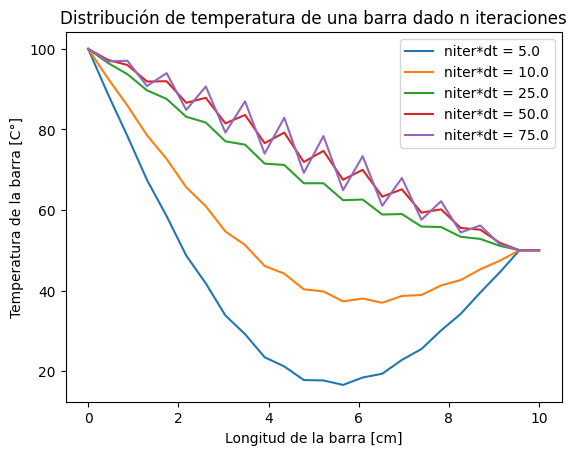

In [14]:
# Solve the problem several for different niter and plot it
fig, ax = plt.subplots()
x = np.linspace(0.0, L, num=NX)
for niter in [50, 100, 250, 500, 750]:
    T = ftcs(T0, niter, DELTAT, DELTAX, LAMBDA)
    ax.plot(x, T, label=f"niter*dt = {niter*DELTAT}")
    ax.set_title("Distribución de temperatura de una barra dado n iteraciones")
    ax.set_xlabel("Longitud de la barra [cm]")
    ax.set_ylabel("Temperatura de la barra [C°]")
ax.legend()

## Exercise
Play with $\lambda$. Is there really any instability?

## A note on derivative boundary conditions
In case you need to fix the derivative a the boundary, let's say an isolated wall on the left, then you could introduce that as

\begin{equation}
u_0^{n+1} = u_0^n + \lambda(u_1^n - 2u_0^n + u_{-1}^n),
\end{equation}
where there is a new imaginary point at $i = -1$. But from the derivative condition you can get its value, since $(u_0 - u_{-1})/\Delta x \simeq \partial u/\partial x$.

# Implicit methods
Implicit methods improve the solution stability and, generally, result in in matrix systems that need to be solve. Examples can be found at https://github.com/numerical-mooc/numerical-mooc/blob/master/lessons/04_spreadout/04_02_Heat_Equation_1D_Implicit.ipynb . One of the most used implicit method is the [Crank-Nicholson method](https://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method) is an implicit method which is commonly used given that it is unconditionally stable. It is second order in time, and its evolution is represented as

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Crank-Nicolson-stencil.svg/200px-Crank-Nicolson-stencil.svg.png" />
</center>

For more info check https://github.com/numerical-mooc/numerical-mooc/tree/master/lessons/04_spreadout


# Parabolic equations in two dimensions
In this case you could be solving problems like

\begin{equation}
\frac{\partial T}{\partial t} = \alpha \left( \frac{\partial^2T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}\right).
\end{equation}

In this case, stability analysis implies that

\begin{equation}
\Delta t \le \frac{1}{8} \frac{\Delta x^2 + \Delta y^2}{\alpha}.
\end{equation}

As with the previous 1D case, implicit schemes improve the stability , but the matrix systems are no longer tri-diagonal and therefore the matrix storage and computational times increase a lot.

There are alternative approaches , like the [ADI-Alternating direction implicit scheme](https://en.wikipedia.org/wiki/Alternating-direction_implicit_method) which can be use in very complex PDE, even non-linear.

In [6]:
!pip install py-pde

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.0/277.0 kB 15.0 MB/s eta 0:00:00


# Exercises
1. Solve the 1D heat equation with a Newmann condition at the left border , where the derivative is null.
2. Solve the heat equation in 2D using the ftcs method

In [7]:
!pip install py-pde

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
